In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

py.sign_in('orgiele', '0hLF1CVCaH5sEU0CG9Ah')
mapbox_access_token = 'pk.eyJ1Ijoib3JnaWVsZSIsImEiOiJjajJ4azAyYnkwMHZ4MnFxbm41d3JocHlzIn0.GDMQKR_XxQIZtPX8dq6K4g'

times = pd.read_csv('data/15-05/trams3-filtered/time-data.csv')
times = times.reindex_axis(times.mean().sort_values().index, axis=1)
means = times.mean()
stds = times.std()

timetable_times = [21, 17, 16, 20, 29, 29]

trace1 = go.Bar(
        x = list(pd.DataFrame(means).index),
        y = means,
        name = "Średni czas przejazdu",
        error_y=dict(
            type='data',
            array=stds,
            visible=True
        )
    )

trace2 = go.Bar(
        x = list(pd.DataFrame(means).index),
        name = "Czas przejazdu wg ZTM",
        y = timetable_times,
    )

data = [trace1, trace2]
layout = go.Layout(
    title='Czas dojazdu tramwajem na Dworzec Centralny z wybranych dzielnic w godzinach szczytu',
    barmode='group'
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename='basic')


In [10]:
df = pd.read_json("data/23-05/trams_lowfloor-filtered.json")
hours = [7, 8, 9, 10, 11, 12]
percentages = []
for h in hours:
    tmp = df[df.Hour == h]
    n = tmp.shape[0]
    m = tmp[tmp.LowFloor == True].shape[0]
    percentages.append(m/n)
    
trace = go.Scatter(
    y = percentages,
    x = hours,
    line = dict(dash = 'dot')
)

data = [trace]
layout = go.Layout(
    title='Odsetek tramwajów niskopodłogowych we wszystkich przejazdach w ciągu danej godziny',
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename='basic')

In [12]:
from plotly.graph_objs import *

def plotTrams(df, colors, file, pitch, zoom):
    data = Data([
        Scattermapbox(
            lat=df['Lat'],
            lon=df['Lon'],
            mode='markers',
            hoverinfo='text',
            marker=Marker(
                size=3,
                opacity=0.7,
                color=colors,
                colorscale='Portland' 
                # Pre-defined color scales - 'pairs' | 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 
                #'Portland' | 'Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu' 
            ),
            text=df['Lines']
        )
    ])

    layout = Layout(
        autosize=True,
        hovermode='closest',
        mapbox=dict(
            accesstoken=mapbox_access_token,
            bearing=0,
            center=dict(
                lat=52.228626,
                lon=21.005654
            ),
            pitch=pitch,
            zoom=zoom
        ),
    )

    fig = dict(data=data, layout=layout)
    py.image.save_as(fig, filename=file)
    from IPython.display import Image
    return Image(file)

trams14 = pd.read_json('file:data/14-05/trams3-filtered.json')
trams15 = pd.read_json('file:data/15-05/trams3-filtered.json')

trams14[]

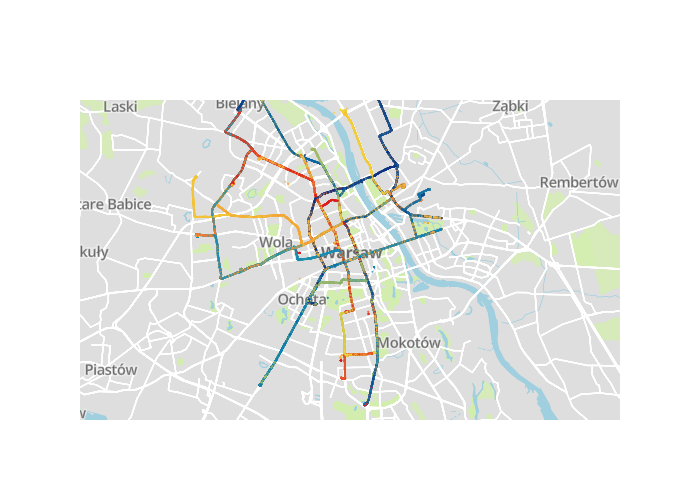

In [19]:
plotTrams(trams14[1:200000], trams14[1:200000]['Lines'], 'trams-14-filtered.png', 0, 9.5)

In [ ]:
plotTrams(trams15[1:200000], trams15[1:200000]['Lines'], 'trams-15-filtered.png', 0, 9.5)